In [1]:
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np
from FCN import FCNs
from FCN import VGGNet 
from torch.autograd import Variable

model = torch.load('./checkpoints/fcn_model_95.pt')
model.eval()

device = torch.device('cuda')
device

device(type='cuda')

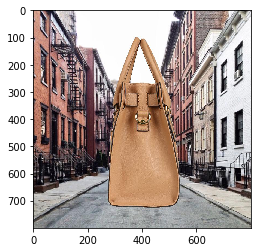

In [2]:
img = Image.open('./last/0.jpg')

plt.imshow(img)

In [3]:
import torchvision.transforms as T
trf2 = T.Compose([T.Resize(256),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
trf = T.Compose([
                    T.ToTensor(),
                    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                ])


inp = trf(img).unsqueeze(0)

(256, 256)

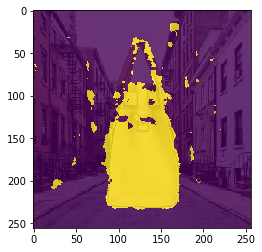

In [4]:
intensor = trf2 (img)
img = img.resize((256,256))
#print(intensor)
intensor = intensor.to(device)
#print(intensor)
batch = intensor.reshape(1,*intensor.shape)
batch.shape, batch.dtype

with torch.no_grad():
    a = model(batch.to(device))
    #print(a)
    #print(a['out'])
re = a.argmax(dim=1).data.cpu().numpy()[0]

plt.imshow
plt.imshow(re)
plt.imshow(img, alpha=0.2)
re.shape